<a href="https://colab.research.google.com/github/harim061/CNN/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) 합성곱 신경망의 구성 요소

## **합성곱 층**

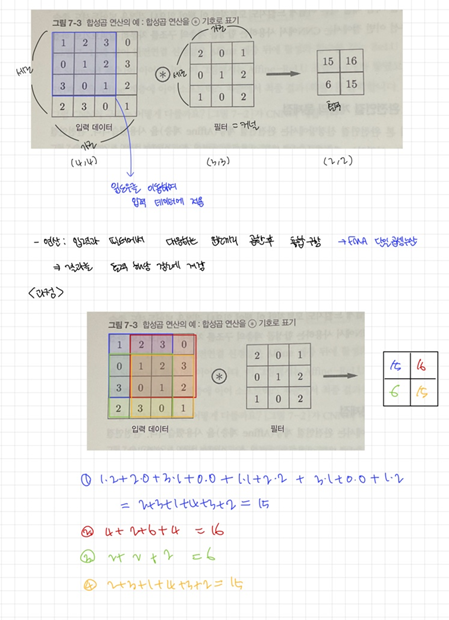

## 케라스의 합성곱 층
- Conv2D(커널의 개수, 필터에 사용할 커널의 크기, 활성화 함수)

In [9]:
from tensorflow import keras
keras.layers.Conv2D(10,kernel_size= (3,3),activation='relu')

## 패딩

- 패딩 : 주위에 0으로 패딩하는 것
  - 출력 크기를 조절 가능
  - 중앙부와 모서리 픽셀이 합성곱에 참여하는 비율이 차이남 -> 패딩으로 해결 ( 이미지의 주변에 있는 정보를 잃어버리지 않도록 함)

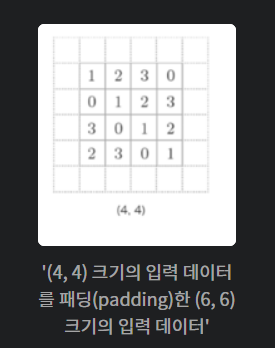

In [10]:
#keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding='same')

## 스트라이드
- 이동의 크기

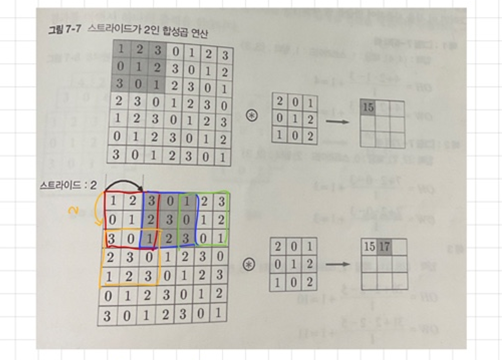

In [11]:
# keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding='same',strides=1)

## 풀링
- 특성 맵의 가로세로 크기를 줄이는 역할을 수행
- 차원은 줄지 않는다

- 최대 풀링, 평균 풀링

In [12]:
keras.layers.MaxPooling2D(2)

# 매개변수 : 풀링의 크기(대부분 2)

## 합성곱 신경망의 전체 구조
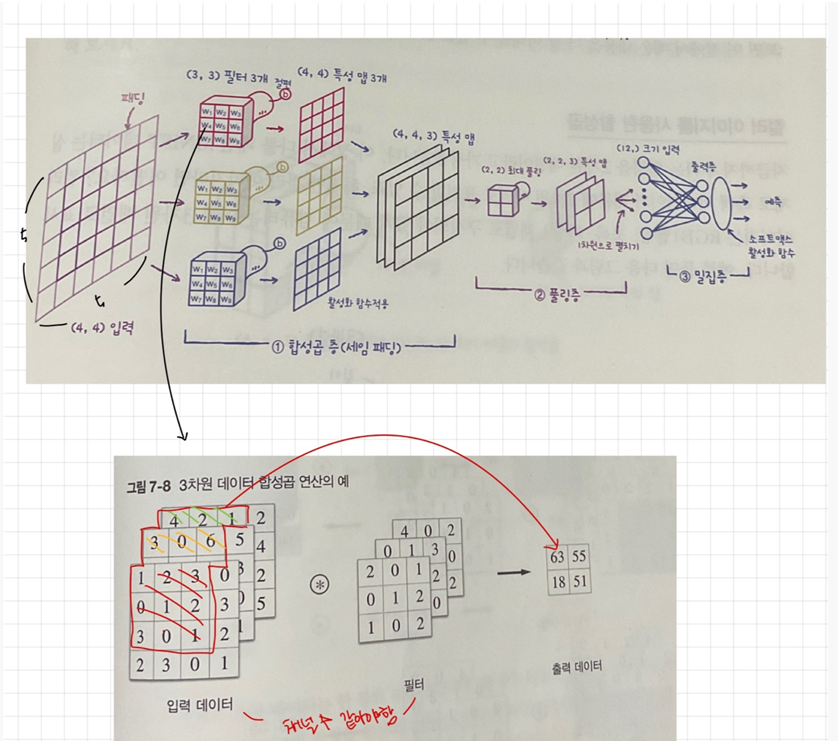

ex) 합성곱 층이 컬러 이미지에 대해 5개의 필터를 사용하 세임 패딩으로 합성곱을 수행한다.
그다음 (2,2) 풀링 층을 통과한 특성 맵의 크기가 (4,4,5)일 때 합성곱층에 주입된 입력의 크기는 얼마인가?

1. 풀링 층을 통과해서 절반이 됨 => (8,8,5)
2. 입력 데이터 * 필터 5개 => (h,w,5)인데 세임 패딩이므로 입력 데이터는 (8,8)
3. 컬러 이므로 (8,8,3)

# 2) 합성곱 신경망을 사용한 이미지 분류

## 패션 MNIST 불러오기

In [13]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

- 채널이 있어야함 reshape메서드를 이용해 차원을 추가

In [14]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

# (48000,28,28) -> train_scaled(48000,28,28,1)

4422102/4422102 [==============================] - 0s 0us/step


### 합성곱 신경망 만들기

In [73]:
model = keras.Sequential()

In [74]:
# 필터 32개 사용, 크기는 3X3, 활성화 함수는 렐루, 세임패딩, 입력 차원은 (28,28,1)
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [75]:
# 풀링 층 추가
model.add(keras.layers.MaxPooling2D(2))

# 세임패딩이므로 합성곱 층에서 출력된 특성 맵의 가로세로 크기는 28x28로 동일
# (2,2) 풀링 적용해서 절반으로 줄어든다
# 필터가 32개이므로 특성맵의 깊이는 32개
# (14,14,32)

In [76]:
model.summary()

# conv2d_2 : (필터) 3*3*1*32 + 32 = 320

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [78]:
# 첫 번째 합성곱-풀링 층 다음에 두 번째 합성곱-풀링 층 추가

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [79]:
model.summary()

# 2번째 합성곱 : 3*3*32(깊이)*64 + 64 = 18496

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [83]:
model.summary()

# flatten : 7 * 7 * 64
# 은닉층 : 3136 * 100 + 100
# 마지막 출력층 : 100 * 10 + 10

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 100)              

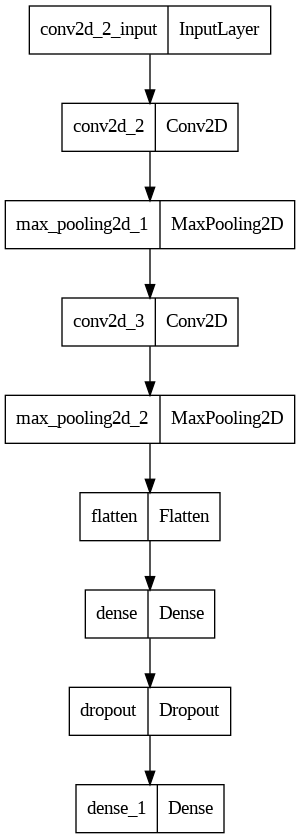

In [23]:
keras.utils.plot_model(model)

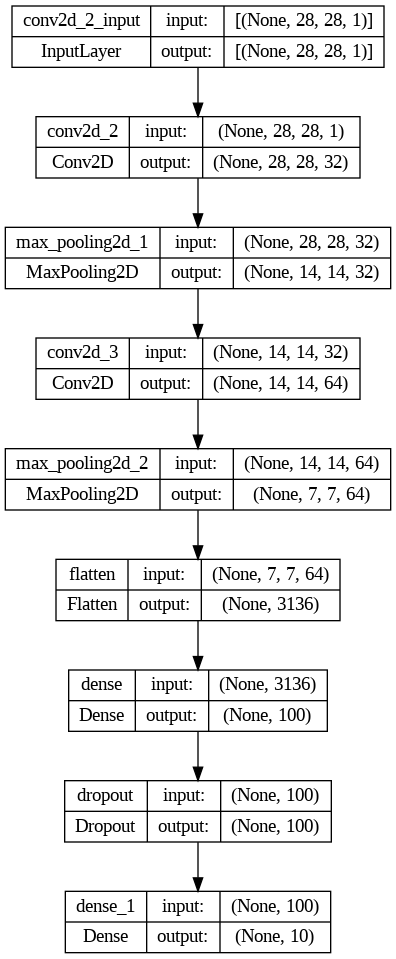

In [24]:
keras.utils.plot_model(model, show_shapes=True)

### 모델 컴파일과 훈련

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 83s 55ms/step - loss: 0.5087 - accuracy: 0.8173 - val_loss: 0.3162 - val_accuracy: 0.8830
Epoch 2/20
1500/1500 [==============================] - 104s 70ms/step - loss: 0.3377 - accuracy: 0.8781 - val_loss: 0.2730 - val_accuracy: 0.8965
Epoch 3/20
1500/1500 [==============================] - 109s 73ms/step - loss: 0.2906 - accuracy: 0.8958 - val_loss: 0.2436 - val_accuracy: 0.9097
Epoch 4/20
1500/1500 [==============================] - 75s 50ms/step - loss: 0.2574 - accuracy: 0.9063 - val_loss: 0.2341 - val_accuracy: 0.9137
Epoch 5/20
1500/1500 [==============================] - 94s 63ms/step - loss: 0.2346 - accuracy: 0.9136 - val_loss: 0.2307 - val_accuracy: 0.9153
Epoch 6/20
1500/1500 [==============================] - 73s 49ms/step - loss: 0.2130 - accuracy: 0.9222 - val_loss: 0.2154 - val_accuracy: 0.9209
Epoch 7/20
1500/1500 [==============================] - 91s 60ms/step - loss: 0.1978 - accuracy: 0.9272 - val_loss: 0.2241

In [26]:
import matplotlib.pyplot as plt

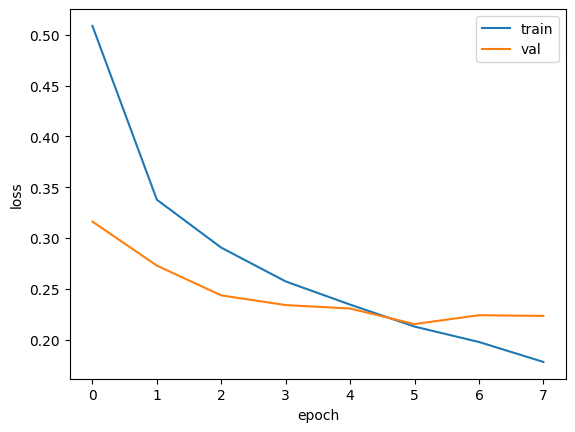

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 8번째 에포크를 최적으로 생각할 수 있음 => 조기종료

In [28]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 6s 15ms/step - loss: 0.2154 - accuracy: 0.9209


[0.21544331312179565, 0.9209166765213013]

#### 이미지 찾기

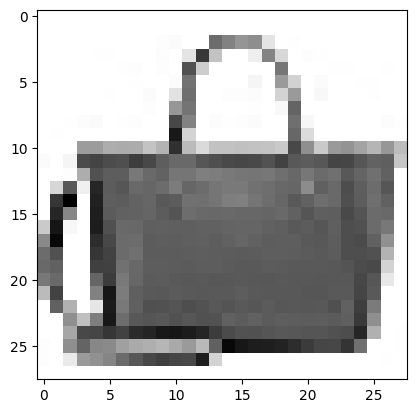

In [29]:
# 샘플 이미지 확인하기
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [30]:
# 모델은 이 이미지에 어떤 예측을 만들까?
preds = model.predict(val_scaled[0:1])
print(preds)

# 아홉번째 값이 1에 가까움 => 9번째 클래스라고 주장

1/1 [==============================] - 0s 176ms/step
[[1.06689004e-13 3.67346649e-23 1.60802852e-17 2.02338608e-16
  2.59285277e-15 7.20286054e-14 1.50633544e-14 2.97381646e-14
  1.00000000e+00 1.13369380e-14]]


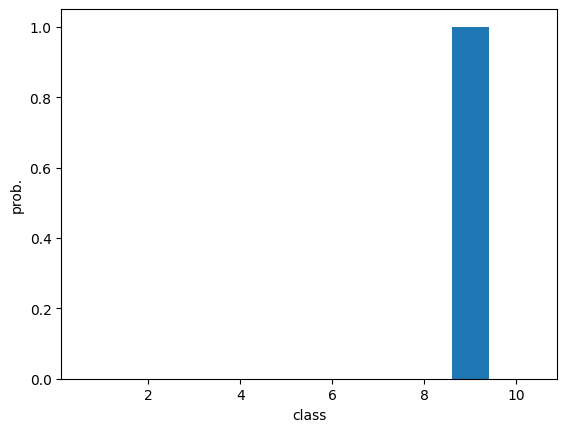

In [31]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [32]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [33]:
import numpy as np
print(classes[np.argmax(preds)])

# 가방으로 예측 성공!

가방


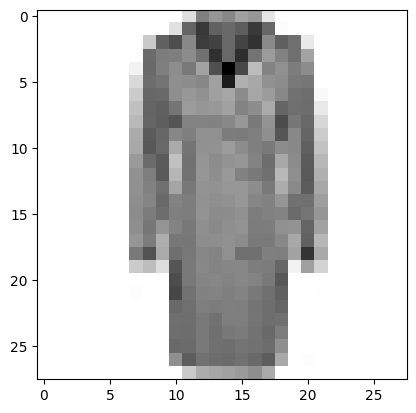

In [34]:
plt.imshow(val_scaled[31].reshape(28,28),cmap='gray_r')
plt.show()

In [35]:
preds = model.predict(val_scaled[31:32])
print(preds)

1/1 [==============================] - 0s 94ms/step
[[5.5720063e-04 1.6010804e-04 5.6784507e-04 1.6131164e-01 8.2751369e-01
  5.3224107e-07 9.8385960e-03 2.2399957e-08 4.9457882e-05 9.8956093e-07]]


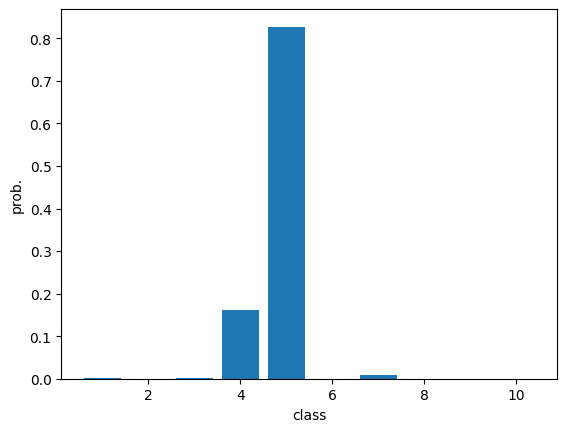

코트


In [36]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

print(classes[np.argmax(preds)])

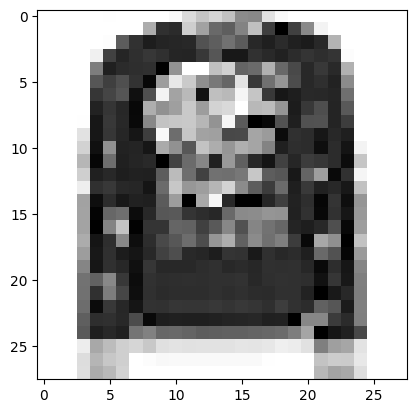

In [37]:
plt.imshow(val_scaled[100].reshape(28,28),cmap='gray_r')
plt.show()

1/1 [==============================] - 0s 31ms/step
[[3.8378793e-03 7.9574889e-08 9.7979248e-01 4.9668733e-06 4.3258965e-03
  1.9288231e-07 1.1498028e-02 2.3448794e-07 5.4000987e-04 2.1005657e-07]]


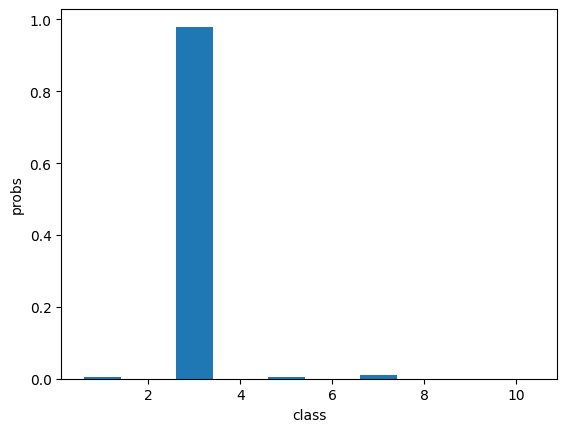

In [38]:
preds = model.predict(val_scaled[100:101])
print(preds)

plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('probs')
plt.show()

In [39]:
print(classes[np.argmax(preds)])

스웨터


In [40]:
# 실전 투입 예상하기

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [41]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2381 - accuracy: 0.9138


[0.2380589097738266, 0.9138000011444092]

# 3) 합성곱 신경망의 시각화
## 가중치 시각화
- 둥근 모서리 -> 가중치 크게 활성화
- 아닌 곳 -> 가중치 낮은 값

In [42]:
model = keras.models.load_model('best-cnn-model.h5')

In [43]:
model.layers

In [44]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [45]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.015002885 0.23111317


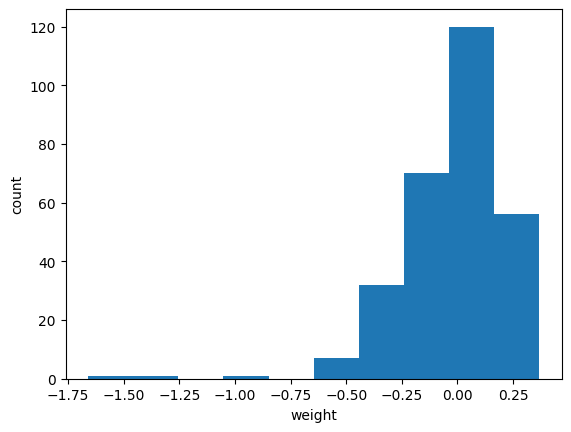

In [46]:
# 1개의 열이 있는 배열로 반환
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

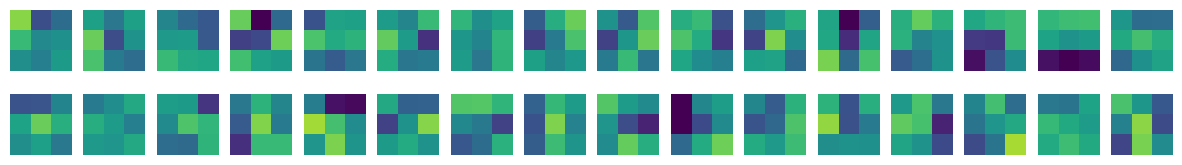

In [47]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

# 32개의 가중치 출력
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [48]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [49]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [50]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.0016975602 0.08003447


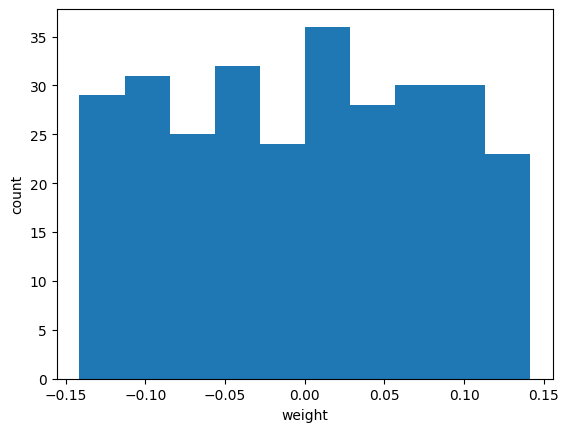

In [51]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

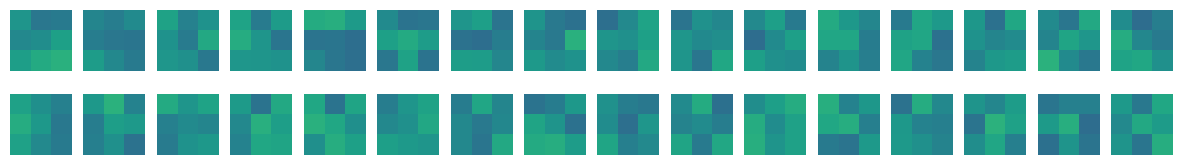

In [52]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

- 합성곱 신경망이 팬선 MNIST 데이터셋의 분류 정확도를 높이기 위해 유용한 패턴을 학습했다! !

## 함수형 API
- 이때까지 케라스 Sequential 클래스를 사용
- predict() 메서드를 호출하면 입력부터 마지막 층까지 계산 후 최종 출력을 반환
-  Conv2D 객체의 output 속성에서 첫 번째 층의 출력을 얻을 수 있음
- 입력층과 출력층을 따로 정의 -> 연결하는 층들을 정의하며 모델 구성

In [53]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


In [54]:
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

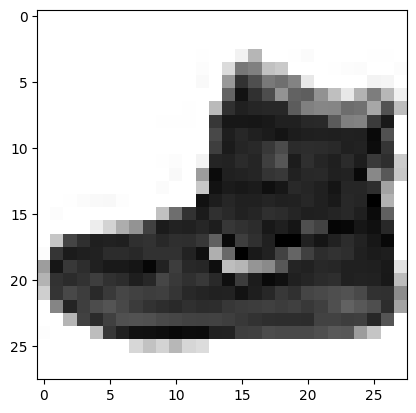

In [55]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [56]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 90ms/step


In [57]:
print(feature_maps.shape)

(1, 28, 28, 32)


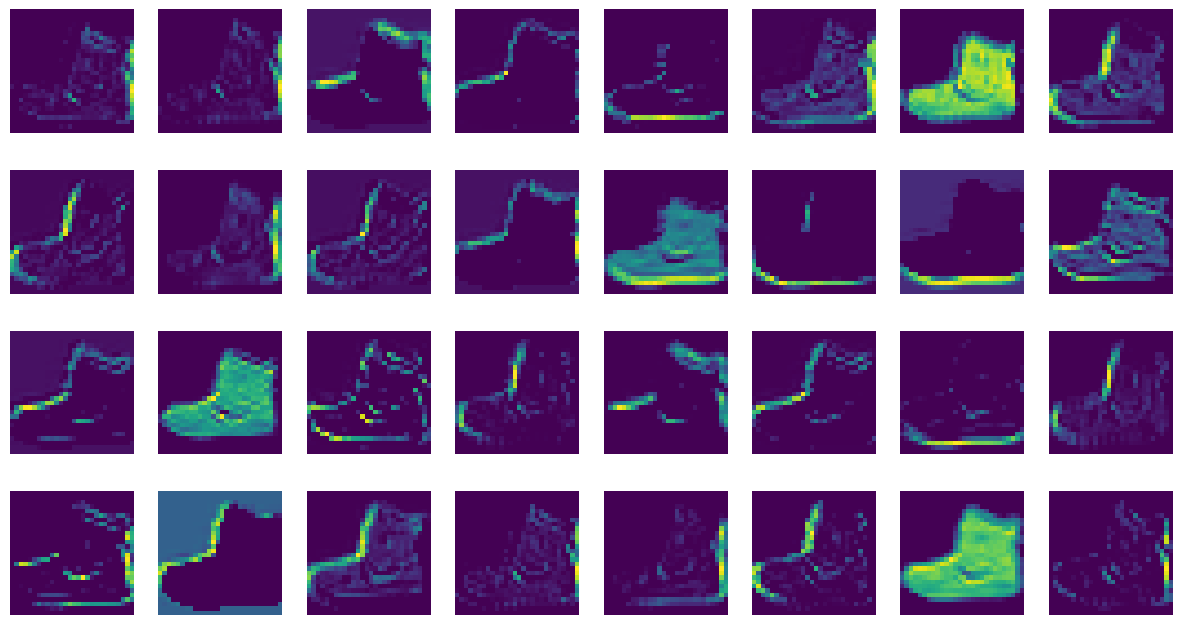

In [58]:
# 강하게 활성화된 부분 보여주기

fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [59]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [60]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 [==============================] - 0s 74ms/step


In [61]:
print(feature_maps.shape)

(1, 14, 14, 64)


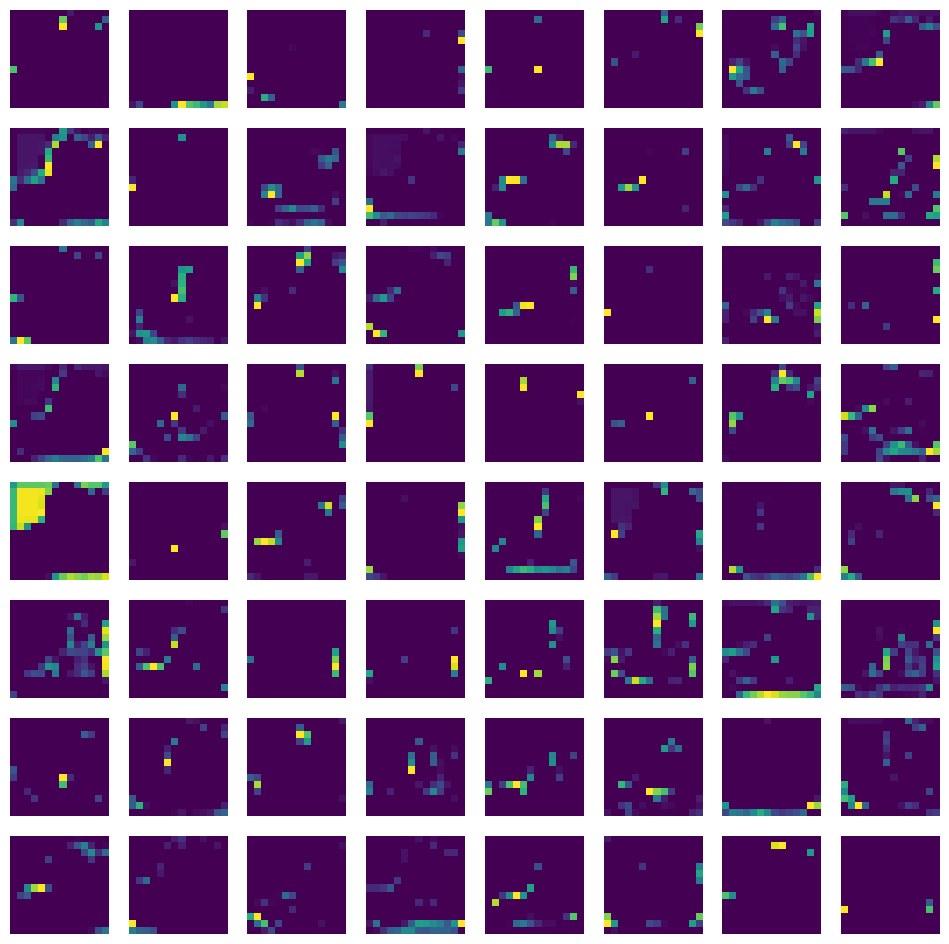

In [62]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

# +) 은닉층
- 입력층과 출력층 사이에 있는 모든 충
- 은닉층의 활성화 함수는 비교적 자유로움 (시그모이드, 렐루 함수)


- 왜 적용?? => 은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없음. 적당하게 비선형적을로 비틀어줘야함



# +) 렐루 함수
- 입력이 양수 -> 입력 통과
- 입력이 음수 -> 0
- max(0,z) = z가 0보다 크면 z출력, 0보다 작으면 0 출력

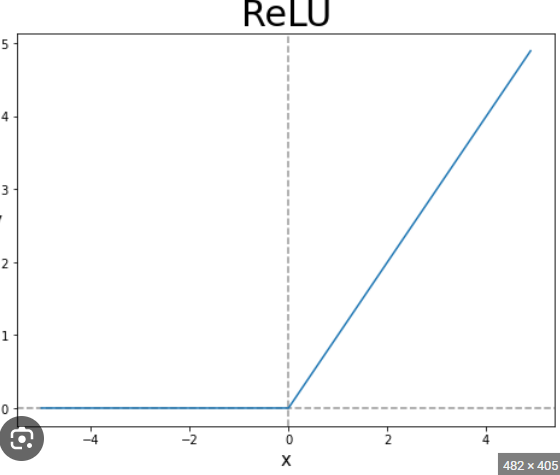

# +) Flatten

- 입력 데이터를 1차원으로 평탄화함
- 가중치를 갖지 않음
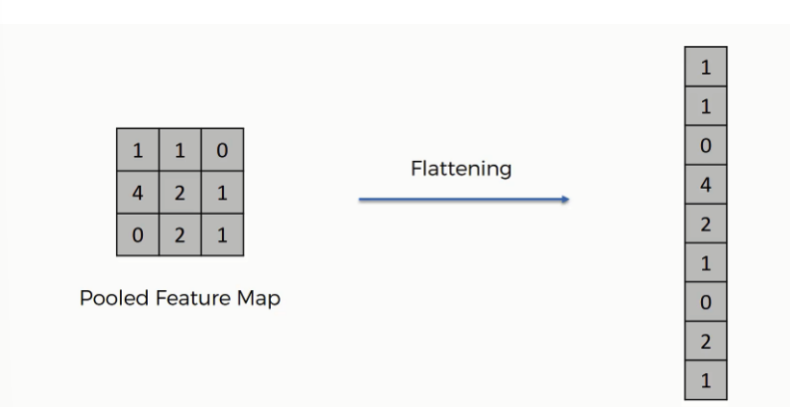

In [63]:
import tensorflow as tf

In [64]:
modelF = tf.keras.Sequential()
modelF.add(tf.keras.layers.Conv1D(32,3,input_shape=(100,1)))
modelF.output_shape

(None, 98, 32)

In [70]:
from keras.layers import Flatten, MaxPooling1D
modelF.add(MaxPooling1D(2))
modelF.output_shape#(None, 49, 32)

(None, 49, 32)

In [71]:
modelF.add(Flatten())
modelF.output_shape#(None, 1568) <- 49*32 = 1568

(None, 1568)

# +) Sequential & Function API

## Sequentail
- 간단한 순차적인 구조를 가진 모델을 쉽게 구성
- 입력층부터 출력층까지 차례대로 쌓아가는 것으로 모델을 구성
- add()메서드를 사용해서 추가
- compile() 로 모델 컴파일

In [66]:
from keras.models import Sequential
from keras.layers import Dense

# 1. Sequential 모델 생성

model = Sequential()

# 2. 입력층과 은닉층 추가
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=32, activation='relu'))

# 3. 출력층 추가
model.add(Dense(units=10, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fucntional API
- 복잡한 모델 구성가능
- 입력층과 출력층 따로 정의, 연결하는 층들을 정의해서 모델 구성

In [67]:
from keras.models import Model
from keras.layers import Input, Dense

# 1. 입력층 정의
inp = Input(shape=(100,))
# 2. 은닉층 정의
x = Dense(units=64, activation='relu')(inp)
x = Dense(units=32, activation='relu')(x)
# 3. 출력층 정의
out = Dense(units=10, activation='softmax')(x)
# 4. 모델 구성
model = Model(inputs=inp, outputs=out)

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# +) Dense
- 가장 기본적인 뉴런 구성 요소 중 하나인 fully connected layer를 구현한 클래스
- 입력 뉴련과 출력 뉴련이 모두 연결되어있는 밀집한 구조를 가짐


# +) Dropout
- 네트워크가 과적합되는 경우를 방지하기 위해서 만들어진 레이어로 학습 과정에서 무작위로 뉴런의 집합을 제거하는 것